<h1><center>Capstone Project - The Battle of Neighborhoods (Week 2)</center></h1>  
<h2>Explore neighborhoods in the cities of Greater Kuala Lumpur to recommend a location for opening a coffee Shop.</h2>

<h3> Introduction/ Business Problem:</h3>

A friend just moved back to Malaysia from Australia recently and is planning to open a coffee shop in Greater Kuala Lumpur. However, he is not sure about the best location to start up his coffee shop. So he ask for my help to recommend the location. With my knowledge in Data Science and skills using location, I will explore cities and neighborhoods in Greater Kuala Lumpur to identify and recommend him the best location for his new coffee shop. This approach is more time-efficient compare to conventional approach(market research, online surveying, etc). 
 
Greater Kuala Lumpur, also refer as Klang Valley is an area in Malaysia which is centered in Kuala Lumpur, and includes its adjoining cities and towns in the state of Selangor. It comprises 3 cities(Kuala Lumpur, Petaling Jaya, Shah Alam) & 6 Municipality(Kajang, Klang, Subang Jaya, Selayang, Ampang Jaya, Sepang). To begin with, I pick the top 2 most populated cities in Greater Kuala Lumpur which is Kuala Lumpur(1,588,750 inhabitants) and Petaling Jaya(613,977 inhabitants), detail refer to [here](https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Malaysia_by_population). Both Kuala Lumpur(KL) and Petaling Jaya are the popular choice amongst city dwellers and visitors alike with its abundance of shopping and gastronomic delights – with thousands of hawker stalls, cafes, and restaurants.[(Read more here)](http://www.kuala-lumpur.ws/?cid=ch:OTH:001) and [here](http://www.kuala-lumpur.ws/klareas/pj.htm). 

There is few critical factors to be considered when choosing a new coffee shop location in order to be profitable and successful such as population, crime rates, visibility & accessibility, surrounding environment and affordability(rental/property pricing).

<h3>Data

<h4>Belows are the data needed to solve this prolem:</h4>  

  * __List of suburbs and neighborhoods of KL and Petaling Jaya with Postalcode:__ Data source from web [here](https://en.wikipedia.org/wiki/Greater_Kuala_Lumpur) and [here](https://en.wikipedia.org/wiki/List_of_Petaling_Jaya_city_sections) for suburbs and postal code from google.  
  Will use this info to get geo-coordinate data using geopy library which can be useful when I use foursquare location API to explore neighborhood API later.  
  * **Foursquare location API:**   
  to explore the neighbourhoods(venues & categotical data) in Kuala Lumpur and Petaling jaya to research surrounding business(is the area affluent?, What types of restaurants/shops in the area? Are they any coffee shop around the neighborhoods, what are trending places in the neighborhoods).
  * **Population, Average Rental pricing, crime level of all suburbs and neighborhoods.** Data source from web [here](https://www.propsocial.my/location/218) and store in IBM DB2 server.  
  can be mapped to the location data above to help identify the potential/selected location if it has enough population, low/average crime level and reasonable rent price.

<h3> Methodology

**Firstly,** I collected the data(list of suburbs and neighborhoods with postal code) and demographic(population, Average Rental pricing, crime levels) from web and create a datatable and store it in IBM DB2 server.  
**Secondly,** load the datasets from server and transform into pandas dataframe. There are 12 suburbs and 107 neighborhoods in Kuala Lumpur and Petaling Jaya.  
**Thirdly,** perform data wrangling/preparation. There were a
lot of missing values from demographic datasets for most of the neighborhoods, because of lack of record keeping. I decided to only use whatever available data. Hence after clean up the missing values, the datasets contain 12 suburbs and 37 neighborhoods. Visualize the neighborhoods in Kuala Lumpur and Petaling Jaya using folium map.  
**Fourth,** to convert addresses(postalcode) into their equivalent latitude and longitude values using geopy library. Then, use the Foursquare API to explore neighborhoods in Greater Kuala Lumpur. After that, use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. I will use the **Machine-Learning K-means clustering algorithm** to complete this task.  
**Fifth,** use the Folium library to visualize the neighborhoods in Greater KL(Kuala Lumpur and Petaling Jaya) and their emerging clusters.  
**Finally,** visualize the overall population and avg for rent listing price of selected cluster of neighborhoods(with complimentary nearby business) using seaborn scatterplot to identify the best location based on high population, low/average crime level and reasonable rent price.

Before we get the data and start exploring it, let's download all the dependencies(libraries) that we will need.

In [1]:
import ibm_db  #for connecting to IBM VB2 server
import ibm_db_dbi

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge ProgressBar2 --yes
from progressbar import ProgressBar
import re
from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### 1. Connect to ibm_db database

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

In [4]:
# The code was removed by Watson Studio for sharing.

Connected to database:


#### 1a. Load and explore data
1. Load List of suburbs and neighborhoods with Zipcode from database and transform into dataframe named 'df'.

In [5]:
pconn = ibm_db_dbi.Connection(conn)
df=pd.read_sql('SELECT * FROM GreaterKLPostalCode', pconn)
print(df.shape)
df.head()

(107, 3)


,SUBURBS,NEIGHBORHOODS,POSTALCODE
0,Kepong,Jinjang,52100
1,Kepong,Taman Bukit Maluri,52100
2,Segambut,Bandar Manjalara,52200
3,Segambut,Bukit Kiara,60000
4,Segambut,Bukit Tunku,50480


#### 1b. Load Population, Crime level and Average for rental listing price data from database and transform into dataframe named 'df1'.

In [6]:
df1=pd.read_sql('SELECT * FROM GreaterKLPopulationRental', pconn)
print(df1.shape)
df1.head()

(37, 11)


,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,CRIMELEVEL,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM
0,Jinjang,54946,13229,807,33574,5435,170,1731,High,4245,1.79
1,Bandar Manjalara,10438,2041,56,7353,529,33,426,Average,2392,1.69
2,Damansara Heights,12335,4111,256,5098,1091,89,1690,Low,34515,4.53
3,Jalan Duta,9885,5212,42,3279,536,14,802,Low,7125,5.60
4,Mont Kiara,13477,830,56,4465,511,68,7547,Average,2285,10.29


#### 1c. Left join dataframe 'df1' to dataframe 'df' and named the new dataframe as 'GKLDF'.

In [7]:
GKLDF = pd.merge(df, df1, how = 'left', on = 'NEIGHBORHOODS')
print(GKLDF.shape)
GKLDF.head()

(107, 13)


,SUBURBS,NEIGHBORHOODS,POSTALCODE,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,CRIMELEVEL,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM
0,Kepong,Jinjang,52100,54946.0,13229.0,807.0,33574.0,5435.0,170.0,1731.0,High,4245.0,1.79
1,Kepong,Taman Bukit Maluri,52100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Segambut,Bandar Manjalara,52200,10438.0,2041.0,56.0,7353.0,529.0,33.0,426.0,Average,2392.0,1.69
3,Segambut,Bukit Kiara,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Segambut,Bukit Tunku,50480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print('The dataframe has {} suburbs and {} neighborhoods.'.format(
        len(GKLDF['SUBURBS'].unique()),
        GKLDF.shape[0]
    )
)

The dataframe has 12 suburbs and 107 neighborhoods.


### 2. Data Wrangling
<h4> 2a. Evaluating missing values

In [9]:
missing_data = GKLDF.isnull()
missing_data.head(5)

,SUBURBS,NEIGHBORHOODS,POSTALCODE,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,CRIMELEVEL,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True,True,True,True,True


"True" stands for missing value, while "False" stands for not missing value.  
Count missing values in each column

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SUBURBS
False    107
Name: SUBURBS, dtype: int64

NEIGHBORHOODS
False    107
Name: NEIGHBORHOODS, dtype: int64

POSTALCODE
False    107
Name: POSTALCODE, dtype: int64

OVERALLPOPULATION
True     70
False    37
Name: OVERALLPOPULATION, dtype: int64

MALAYPOPULATION
True     70
False    37
Name: MALAYPOPULATION, dtype: int64

OTHERBUMIPOPULATION
True     70
False    37
Name: OTHERBUMIPOPULATION, dtype: int64

CHINESEPOPULATION
True     70
False    37
Name: CHINESEPOPULATION, dtype: int64

INDIANPOPULATION
True     70
False    37
Name: INDIANPOPULATION, dtype: int64

OTHERSPOPULATION
True     70
False    37
Name: OTHERSPOPULATION, dtype: int64

NONMALAYSIAN
True     70
False    37
Name: NONMALAYSIAN, dtype: int64

CRIMELEVEL
True     70
False    37
Name: CRIMELEVEL, dtype: int64

AVGFORRENTLISTINGPRICE_RM
True     70
False    37
Name: AVGFORRENTLISTINGPRICE_RM, dtype: int64

AVGFORRENTLISTINGPRICE_PSF_RM
True     70
False    37
Name: AVGFORRENTLISTINGPRICE_PSF_RM, dtype: int64



Based on the summary above, each column has 107 rows of data, ten columns containing missing data:
Population related data, Crime Level & Avg Rental Listing price(psf) each has ~70 missing data.  
**Hence,I will drop 70 row of missing data and proceed with 37 row of data for this project.**

In [11]:
GKLDF = GKLDF.dropna()
GKLDF.reset_index(drop=True, inplace=True)
print(GKLDF.shape)
GKLDF.head()

(37, 13)


,SUBURBS,NEIGHBORHOODS,POSTALCODE,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,CRIMELEVEL,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM
0,Kepong,Jinjang,52100,54946.0,13229.0,807.0,33574.0,5435.0,170.0,1731.0,High,4245.0,1.79
1,Segambut,Bandar Manjalara,52200,10438.0,2041.0,56.0,7353.0,529.0,33.0,426.0,Average,2392.0,1.69
2,Segambut,Damansara Heights,50490,12335.0,4111.0,256.0,5098.0,1091.0,89.0,1690.0,Low,34515.0,4.53
3,Segambut,Jalan Duta,50480,9885.0,5212.0,42.0,3279.0,536.0,14.0,802.0,Low,7125.0,5.60
4,Segambut,Mont Kiara,50480,13477.0,830.0,56.0,4465.0,511.0,68.0,7547.0,Average,2285.0,10.29


In [12]:
print('The dataframe has {} suburbs and {} neighborhoods.'.format(
        len(GKLDF['SUBURBS'].unique()),
        GKLDF.shape[0]
    ))

The dataframe has 12 suburbs and 37 neighborhoods.


#### 2b. Group Population data by PostalCode under new Dataframe named 'GKLGPop1'.

In [13]:
GKL_GPop = GKLDF[['POSTALCODE', 'OVERALLPOPULATION', 'MALAYPOPULATION', 'OTHERBUMIPOPULATION', 'CHINESEPOPULATION', 'INDIANPOPULATION', 'OTHERSPOPULATION', 'NONMALAYSIAN']]
GKL_GPop1 = GKL_GPop.groupby(['POSTALCODE'], as_index = False).sum()
GKL_GPop1.head()

,POSTALCODE,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN
0,46150,5002.0,862.0,67.0,1420.0,300.0,27.0,2326.0
1,47301,5690.0,1344.0,11.0,3709.0,281.0,38.0,307.0
2,47400,13711.0,2608.0,63.0,9080.0,892.0,158.0,910.0
3,47410,21239.0,5198.0,275.0,13060.0,978.0,94.0,1634.0
4,47810,63637.0,41996.0,509.0,11230.0,5165.0,445.0,4292.0


#### Group Average rental price data by PostalCode under new dataframe named 'GKL_Rent1'.

In [14]:
GKL_Rent = GKLDF[['POSTALCODE','AVGFORRENTLISTINGPRICE_RM', 'AVGFORRENTLISTINGPRICE_PSF_RM']]
GKL_Rent1 = GKL_Rent.groupby(['POSTALCODE']).mean()
GKL_Rent1.head()

,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM
POSTALCODE,,
46150,1634.0,8.640
47301,7433.0,2.740
47400,9633.5,3.720
47410,7722.0,4.840
47810,11709.5,6.025


#### Combining rows into one row with Neighborhoods separated with a comma for those Similar Postalcode with more than one Neighborhoods name

In [15]:
GKLNeigh=GKLDF.groupby(['POSTALCODE'])['NEIGHBORHOODS'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()
GKLNeigh.POSTALCODE = GKLNeigh.POSTALCODE.astype(int)
print(GKLNeigh.head())
GKLNeigh.shape

   POSTALCODE                                   NEIGHBORHOODS
0       46150                                   Bandar Sunway
1       47301                                   Ara Damansara
2       47400                Damansara Utama,  Damansara Jaya
3       47410   Tropicana, Damansara Indah n Sunway Damansara
4       47810               Kota Damansara, Mutiara Damansara


(28, 2)

#### Combining rows into one row with CRIMELEVEL separated with a comma for those Similar Postalcode with more than one CRIMELEVEL

In [16]:
GKLCrime = GKLDF.groupby(['POSTALCODE'])['CRIMELEVEL'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()
GKLCrime.POSTALCODE = GKLCrime.POSTALCODE.astype(int)
GKLCrime.head(3)

,POSTALCODE,CRIMELEVEL
0,46150,High
1,47301,Low
2,47400,"High, Average"


#### Left joining DataFrame 'GKL_GPop', 'GKL_Rent1' and 'GKLCrime' to DataFrame 'GKLNeigh under new DataFrame 'GKLNeighF'.

In [17]:
GKLNeigh1 = pd.merge(GKLNeigh, GKL_GPop1, how = 'left', on = 'POSTALCODE')

In [18]:
GKLNeigh2 = pd.merge(GKLNeigh1, GKL_Rent1, how = 'left', on = 'POSTALCODE')

In [19]:
GKLNeighF = pd.merge(GKLNeigh2, GKLCrime, how = 'left', on = 'POSTALCODE')
print(GKLNeighF.shape)
GKLNeighF.head()

(28, 12)


,POSTALCODE,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL
0,46150,Bandar Sunway,5002.0,862.0,67.0,1420.0,300.0,27.0,2326.0,1634.0,8.640,High
1,47301,Ara Damansara,5690.0,1344.0,11.0,3709.0,281.0,38.0,307.0,7433.0,2.740,Low
2,47400,"Damansara Utama, Damansara Jaya",13711.0,2608.0,63.0,9080.0,892.0,158.0,910.0,9633.5,3.720,"High, Average"
3,47410,"Tropicana, Damansara Indah n Sunway Damansara",21239.0,5198.0,275.0,13060.0,978.0,94.0,1634.0,7722.0,4.840,Average
4,47810,"Kota Damansara, Mutiara Damansara",63637.0,41996.0,509.0,11230.0,5165.0,445.0,4292.0,11709.5,6.025,"Average, Average"


In [20]:
#Creating columns for the Latitude and Longitude for each PostalCode
GKLNeighF['Country'] = ', Malaysia'
GKLNeighF['CountryZip'] = GKLNeighF['POSTALCODE'].astype(str) + GKLNeighF['Country']
GKLNeighF['Latitude'] = np.nan
GKLNeighF['Longitude'] = np.nan
GKLNeighF.head()

,POSTALCODE,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude
0,46150,Bandar Sunway,5002.0,862.0,67.0,1420.0,300.0,27.0,2326.0,1634.0,8.640,High,", Malaysia","46150, Malaysia",NaN,NaN
1,47301,Ara Damansara,5690.0,1344.0,11.0,3709.0,281.0,38.0,307.0,7433.0,2.740,Low,", Malaysia","47301, Malaysia",NaN,NaN
2,47400,"Damansara Utama, Damansara Jaya",13711.0,2608.0,63.0,9080.0,892.0,158.0,910.0,9633.5,3.720,"High, Average",", Malaysia","47400, Malaysia",NaN,NaN
3,47410,"Tropicana, Damansara Indah n Sunway Damansara",21239.0,5198.0,275.0,13060.0,978.0,94.0,1634.0,7722.0,4.840,Average,", Malaysia","47410, Malaysia",NaN,NaN
4,47810,"Kota Damansara, Mutiara Damansara",63637.0,41996.0,509.0,11230.0,5165.0,445.0,4292.0,11709.5,6.025,"Average, Average",", Malaysia","47810, Malaysia",NaN,NaN


In [21]:
# Generating latitude and longitude for each postalcode of Greater KL(Kuala Lumpure & Petaling Jaya)neighbourhoods.
pbar = ProgressBar()
geolocator = Nominatim()
for index in range(0, GKLNeighF['CountryZip'].shape[0]):
    address = GKLNeighF.loc[index, 'CountryZip']
    location = geolocator.geocode(address, timeout = None)
    if (location != None):
        GKLNeighF.loc[index, 'Latitude'] = location.latitude
        GKLNeighF.loc[index, 'Longitude'] = location.longitude
    sleep(1)
print(GKLNeighF.shape)
GKLNeighF.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.


(28, 16)


,POSTALCODE,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude
0,46150,Bandar Sunway,5002.0,862.0,67.0,1420.0,300.0,27.0,2326.0,1634.0,8.640,High,", Malaysia","46150, Malaysia",3.073520,101.612935
1,47301,Ara Damansara,5690.0,1344.0,11.0,3709.0,281.0,38.0,307.0,7433.0,2.740,Low,", Malaysia","47301, Malaysia",3.108895,101.592445
2,47400,"Damansara Utama, Damansara Jaya",13711.0,2608.0,63.0,9080.0,892.0,158.0,910.0,9633.5,3.720,"High, Average",", Malaysia","47400, Malaysia",3.130599,101.620482
3,47410,"Tropicana, Damansara Indah n Sunway Damansara",21239.0,5198.0,275.0,13060.0,978.0,94.0,1634.0,7722.0,4.840,Average,", Malaysia","47410, Malaysia",3.138934,101.603415
4,47810,"Kota Damansara, Mutiara Damansara",63637.0,41996.0,509.0,11230.0,5165.0,445.0,4292.0,11709.5,6.025,"Average, Average",", Malaysia","47810, Malaysia",3.155758,101.588617


#### Get the geographical coordinates of Greater Kuala Lumpur

In [22]:
address1 = 'Kuala Lumpur, MY'
geolocator = Nominatim(user_agent='my_explorer')
location1 = geolocator.geocode(address1)
latitude = location1.latitude
longitude = location1.longitude
print('The geographical coordinate of Greater Kuala Lumpur are {},{}.'.format(latitude, longitude))

The geographical coordinate of Greater Kuala Lumpur are 3.1516636,101.6943028.


#### Let's visualize Kuala Lumpur & Petaling Jaya the neighborhoods in it.

In [23]:
#create map of Greater Kuala Lumpur(Kuala Lumpur & Petaling Jaya) using latitude & longitude values
map_GKL = folium.Map(location = [latitude, longitude], zoom_start = 11)

#add markers to map
for lat, lng, label in zip(GKLNeighF['Latitude'], GKLNeighF['Longitude'], GKLNeighF['NEIGHBORHOODS']):
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([lat, lng], radius =5, popup = label, color = 'blue',
                        fill = True, fill_color ='#3186cc', fill_opacity=0.7,
                        parse_html=False).add_to(map_GKL)
map_GKL

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
# create a function to repeat the same process to neighborhoods(Neigh) in Greater KL(Kuala Lumpur & Petaling Jaya)
def getNearbyVenues(names, latitudes, longitudes, radius = 2000):
    venues_list =[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL    
        url= 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             name,
             lat,
             lng,
             v['venue']['name'],
             v['venue']['location']['lat'],
             v['venue']['location']['lng'],
             v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neigh',
                            'Neigh Latitude',
                            'Neigh Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    return(nearby_venues)

In [26]:
#run the above function on each neighborhoods and create new dataframe called GKL_venues
GKL_venues = getNearbyVenues(names=GKLNeighF['NEIGHBORHOODS'],
                                 latitudes = GKLNeighF['Latitude'],
                                 longitudes = GKLNeighF['Longitude'])

 Bandar Sunway
 Ara Damansara
 Damansara Utama,  Damansara Jaya
 Tropicana, Damansara Indah n Sunway Damansara
    Kota Damansara, Mutiara Damansara
 Damansara Perdana
 Damansara Damai
 KL City Centre
 Chow Kit
 Brickfields
   Jalan Duta,   Mont Kiara, Sri Hartamas
 Damansara Heights
 Sentul
 Jinjang
     Bandar Manjalara, Bandar Sri Damansara
 Setapak
 Kampung Datuk Keramat
 Pudu
            Alam Damai, Bandar Sri Permaisuri
          Bukit Jalil,         Sri Petaling, Bandar Tasik Selatan,          Sungai Besi
 Desa Petaling
 Mid Valley City
 Taman Desa
 Kuchai Lama
 Bangsar
 Bangsar South (Kerinchi)
 Taman Tun Dr Ismail
 Ampang


#### Let's check the size of the resulting dataframe¶

In [27]:
print(GKL_venues.shape)
GKL_venues.head()

(2795, 7)


,Neigh,Neigh Latitude,Neigh Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bandar Sunway,3.07352,101.612935,Sunway Resort Swiming Pool,3.070452,101.608302,Pool
1,Bandar Sunway,3.07352,101.612935,Sunway Resort Hotel & Spa,3.071160,101.608737,Hotel
2,Bandar Sunway,3.07352,101.612935,Boost Juice Bars,3.072113,101.607616,Juice Bar
3,Bandar Sunway,3.07352,101.612935,Sunway Lagoon Surf Beach,3.069960,101.607120,Surf Spot
4,Bandar Sunway,3.07352,101.612935,Nasi Ayam Penyet Mak Lampir,3.077195,101.610146,Indonesian Restaurant


Check how many venues were returned for each neighborhood

In [28]:
GKL_venues.groupby('Neigh').count()

,Neigh Latitude,Neigh Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neigh,,,,,,
"Alam Damai, Bandar Sri Permaisuri",100,100,100,100,100,100
"Bukit Jalil, Sri Petaling, Bandar Tasik Selatan, Sungai Besi",100,100,100,100,100,100
"Bandar Manjalara, Bandar Sri Damansara",100,100,100,100,100,100
"Kota Damansara, Mutiara Damansara",100,100,100,100,100,100
"Jalan Duta, Mont Kiara, Sri Hartamas",100,100,100,100,100,100
Ampang,100,100,100,100,100,100
Ara Damansara,100,100,100,100,100,100
Bandar Sunway,100,100,100,100,100,100
Bangsar,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues¶

In [29]:
print('There are {} uniques categories.'.format(len(GKL_venues['Venue Category'].unique())))

There are 280 uniques categories.


## Analyze Each Neighborhood¶

In [30]:
# one hot encoding
GKL_onehot = pd.get_dummies(GKL_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
GKL_onehot['Neigh'] = GKL_venues['Neigh'] 

# move neighborhood column to the first column
fixed_columns = [GKL_onehot.columns[-1]] + list(GKL_onehot.columns[:-1])
GKL_onehot = GKL_onehot[fixed_columns]

GKL_onehot.head()

,Neigh,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Business Service,Café,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Hill,Historic Site,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Lounge,Macanese Restaurant,Malay Restaurant,Mamak Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Event Space,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Prayer Room,Pub,Public Art,Ramen Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skate Park,Ski Chalet,Ski Lodge,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tunnel,Udon Restaurant,Vacation Rental,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Bandar Sunw

And let's examine the new dataframe size.

In [31]:
GKL_onehot.shape

(2795, 281)

#### Next, let's group rows by neigh and by taking the mean of the frequency of occurrence of each category¶

In [32]:
GKL_grouped = GKL_onehot.groupby('Neigh').mean().reset_index()
GKL_grouped.head()

,Neigh,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Business Service,Café,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Hill,Historic Site,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Lounge,Macanese Restaurant,Malay Restaurant,Mamak Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Event Space,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Prayer Room,Pub,Public Art,Ramen Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skate Park,Ski Chalet,Ski Lodge,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tunnel,Udon Restaurant,Vacation Rental,Vape Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Alam Damai

In [33]:
# lets confirm the new size
GKL_grouped.shape

(28, 281)

#### Let's put the top venues of each neighbourhood in Toronto into a pandas dataframe¶

First, let's write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neigh']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
GKL_venues_sorted = pd.DataFrame(columns=columns)
GKL_venues_sorted['Neigh'] = GKL_grouped['Neigh']

for ind in np.arange(GKL_grouped.shape[0]):
    GKL_venues_sorted.iloc[ind, 1:] = return_most_common_venues(GKL_grouped.iloc[ind, :], num_top_venues)

GKL_venues_sorted.head()

,Neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Alam Damai, Bandar Sri Permaisuri",Chinese Restaurant,Malay Restaurant,Asian Restaurant,Seafood Restaurant,Café,Breakfast Spot,Pizza Place,Noodle House,Indonesian Restaurant,Food Truck
1,"Bukit Jalil, Sri Petaling, B...",Café,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Coffee Shop,Restaurant,Vegetarian / Vegan Restaurant,Massage Studio,Bubble Tea Shop,Burger Joint
2,"Bandar Manjalara, Bandar Sri Damansara",Chinese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Food Truck,Pizza Place,Restaurant,Park
3,"Kota Damansara, Mutiara Damansara",Café,Coffee Shop,Malay Restaurant,Bakery,Golf Course,Massage Studio,Bubble Tea Shop,Thai Restaurant,Burger Joint,Spa
4,"Jalan Duta, Mont Kiara, Sri Hartamas",Japanese Restaurant,Café,Asian Restaurant,Korean Restaurant,Ice Cream Shop,Italian Restaurant,Bakery,Gym / Fitness Center,Seafood Restaurant,Spa


## Segmenting and Clustering Neighborhoods

Run k-means to cluster the neighborhood into 4 clusters.

In [36]:
# set number of clusters
kclusters = 4
GKL_grouped_clustering = GKL_grouped.drop('Neigh', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(GKL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:11]

array([0, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
GKL_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

GKL_combine = GKLNeighF

# merge GKL_grouped with GKLNeighF to add latitude/longitude for each neighborhood
GKL_combine = GKL_combine.join(GKL_venues_sorted.set_index('Neigh'), on='NEIGHBORHOODS')

GKL_combine.tail() # check the last columns!

,POSTALCODE,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,58200,Kuchai Lama,23130.0,4222.0,214.0,15058.0,1856.0,76.0,1704.0,6244.0,2.63,High,", Malaysia","58200, Malaysia",3.085899,101.677512,3,Chinese Restaurant,Café,Asian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Korean Restaurant,Bakery,BBQ Joint
24,59000,Bangsar,27568.0,10128.0,157.0,8215.0,5735.0,177.0,3156.0,13388.0,321.41,Average,", Malaysia","59000, Malaysia",3.131593,101.674625,1,Indian Restaurant,Hotel,Shopping Mall,Café,Steakhouse,Ice Cream Shop,Juice Bar,Clothing Store,Bar,Coffee Shop
25,59200,Bangsar South (Kerinchi),1773.0,1302.0,21.0,136.0,189.0,0.0,125.0,0.0,0.00,Average,", Malaysia","59200, Malaysia",3.105585,101.667909,2,Japanese Restaurant,Coffee Shop,Ice Cream Shop,Café,Hotel,Asian Restaurant,Restaurant,Chinese Restaurant,Bakery,Breakfast Spot
26,60000,Taman Tun Dr Ismail,18851.0,7884.0,91.0,7924.0,1341.0,124.0,1487.0,12948.0,11.93,Average,", Malaysia","60000, Malaysia",3.140501,101.628224,2,Bakery,Dessert Shop,Burger Joint,Café,Ice Cream Shop,Indian Restaurant,Restaurant,Malay Restaurant,Chinese Restaurant,Supermarket
27,68000,Ampang,238709.0,130134.0,1338.0,58756.0,18804.0,5095.0,24582.0,3827.0,4.69,Average,", Malaysia","68000, Malaysia",3.207350,101.756821,2,Malay Restaurant,Asian Restaurant,Coffee Shop,Restaurant,Burger Joint,Café,Gym / Fitness Center,Chinese Restaurant,Boutique,Food Truck


## Finally, let's visualize the resulting clusters

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(GKL_combine['Latitude'], GKL_combine['Longitude'], GKL_combine['NEIGHBORHOODS'], GKL_combine['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters¶

Now, examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, then assign a name to each cluster.

Cluster 1

In [39]:
GKL_combine.loc[GKL_combine['Cluster Labels'] == 0, GKL_combine.columns[[1] + list(range(2, GKL_combine.shape[1]))]]

,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Damansara Damai,44910.0,26992.0,497.0,8851.0,4918.0,348.0,3304.0,1779.0,1.34,Average,", Malaysia","47830, Malaysia",3.197427,101.592788,0,Malay Restaurant,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Café,Fast Food Restaurant,Burger Joint,Ice Cream Shop,Pizza Place,Flower Shop
13,Jinjang,54946.0,13229.0,807.0,33574.0,5435.0,170.0,1731.0,4245.0,1.79,High,", Malaysia","52100, Malaysia",3.209695,101.615605,0,Chinese Restaurant,Noodle House,Asian Restaurant,Café,Indian Restaurant,Burger Joint,Cantonese Restaurant,Seafood Restaurant,Malay Restaurant,Trail
15,Setapak,88320.0,53264.0,1239.0,19696.0,4150.0,2127.0,7844.0,5097.0,2.60,High,", Malaysia","53200, Malaysia",3.191315,101.713538,0,Chinese Restaurant,Malay Restaurant,Asian Restaurant,Café,Coffee Shop,Food Court,Thai Restaurant,Fast Food Restaurant,Dance Studio,Halal Restaurant
18,"Alam Damai, Bandar Sri Permaisuri",39356.0,25022.0,404.0,10683.0,1593.0,86.0,1568.0,3099.5,5.68,"Average, Average",", Malaysia","56000, Malaysia",3.101620,101.728337,0,Chinese Restaurant,Malay Restaurant,Asian Restaurant,Seafood Restaurant,Café,Breakfast Spot,Pizza Place,Noodle House,Indonesian Restaurant,Food Truck
20,Desa Petaling,19066.0,5370.0,179.0,11397.0,1203.0,116.0,801.0,0.0,0.00,High,", Malaysia","57100, Malaysia",3.081433,101.713298,0,Chinese Restaurant,Malay Restaurant,Asian Restaurant,Indian Restaurant,Burger Joint,Convenience Store,Flea Market,Pool Hall,Bakery,Department Store


Cluster 2

In [40]:
GKL_combine.loc[GKL_combine['Cluster Labels'] == 1, GKL_combine.columns[[1] + list(range(2, GKL_combine.shape[1]))]]

,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,KL City Centre,3341.0,498.0,20.0,1058.0,214.0,14.0,1537.0,9825.0,9.21,High,", Malaysia","50000, Malaysia",3.144790,101.697514,1,Hotel,Café,Spa,Food Truck,Indian Restaurant,Speakeasy,Malay Restaurant,Motel,Boutique,Juice Bar
8,Chow Kit,11963.0,3632.0,116.0,4487.0,844.0,128.0,2756.0,0.0,0.00,High,", Malaysia","50350, Malaysia",3.161159,101.694878,1,Hotel,Malay Restaurant,Coffee Shop,Thai Restaurant,Chinese Restaurant,Convenience Store,Clothing Store,Restaurant,Department Store,Soup Place
9,Brickfields,9484.0,1105.0,68.0,1215.0,3341.0,74.0,3681.0,0.0,0.00,High,", Malaysia","50470, Malaysia",3.132625,101.687314,1,Hotel,Indian Restaurant,Café,Ice Cream Shop,Hotel Bar,Coffee Shop,Steakhouse,Garden,Convenience Store,Malay Restaurant
16,Kampung Datuk Keramat,25246.0,22553.0,239.0,1179.0,442.0,40.0,793.0,3511.0,1.87,Average,", Malaysia","54000, Malaysia",3.167197,101.725897,1,Hotel,Coffee Shop,Juice Bar,Café,Malay Restaurant,Cosmetics Shop,Italian Restaurant,Cocktail Bar,Seafood Restaurant,Restaurant
17,Pudu,37207.0,10712.0,362.0,16698.0,4766.0,136.0,4533.0,0.0,0.00,NaN,", Malaysia","55100, Malaysia",3.139113,101.725283,1,Chinese Restaurant,Hotel,Asian Restaurant,Nightclub,Shopping Mall,Coffee Shop,Noodle House,Middle Eastern Restaurant,Café,Bar
24,Bangsar,27568.0,10128.0,157.0,8215.0,5735.0,177.0,3156.0,13388.0,321.41,Average,", Malaysia","59000, Malaysia",3.131593,101.674625,1,Indian Restaurant,Hotel,Shopping Mall,Café,Steakhouse,Ice Cream Shop,Juice Bar,Clothing Store,Bar,Coffee Shop


Cluster 3

In [41]:
GKL_combine.loc[GKL_combine['Cluster Labels'] == 2, GKL_combine.columns[[1] + list(range(2, GKL_combine.shape[1]))]]

,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandar Sunway,5002.0,862.0,67.0,1420.0,300.0,27.0,2326.0,1634.0,8.640,High,", Malaysia","46150, Malaysia",3.073520,101.612935,2,Chinese Restaurant,Coffee Shop,Café,Malay Restaurant,Restaurant,Smoke Shop,Ice Cream Shop,Indonesian Restaurant,Cosmetics Shop,Clothing Store
1,Ara Damansara,5690.0,1344.0,11.0,3709.0,281.0,38.0,307.0,7433.0,2.740,Low,", Malaysia","47301, Malaysia",3.108895,101.592445,2,Café,Chinese Restaurant,Italian Restaurant,Malay Restaurant,Clothing Store,Steakhouse,Burger Joint,Thai Restaurant,Resort,Sushi Restaurant
2,"Damansara Utama, Damansara Jaya",13711.0,2608.0,63.0,9080.0,892.0,158.0,910.0,9633.5,3.720,"High, Average",", Malaysia","47400, Malaysia",3.130599,101.620482,2,Chinese Restaurant,Café,Korean Restaurant,Ice Cream Shop,Bakery,Burger Joint,Dessert Shop,Malay Restaurant,Convenience Store,Massage Studio
3,"Tropicana, Damansara Indah n Sunway Damansara",21239.0,5198.0,275.0,13060.0,978.0,94.0,1634.0,7722.0,4.840,Average,", Malaysia","47410, Malaysia",3.138934,101.603415,2,Multiplex,Juice Bar,Spa,Shopping Mall,Ice Cream Shop,Indonesian Restaurant,Café,Flea Market,Bubble Tea Shop,Bar
4,"Kota Damansara, Mutiara Damansara",63637.0,41996.0,509.0,11230.0,5165.0,445.0,4292.0,11709.5,6.025,"Average, Average",", Malaysia","47810, Malaysia",3.155758,101.588617,2,Café,Coffee Shop,Malay Restaurant,Bakery,Golf Course,Massage Studio,Bubble Tea Shop,Thai Restaurant,Burger Joint,Spa
5,Damansara Perdana,11643.0,3645.0,423.0,5552.0,494.0,152.0,1377.0,3133.0,6.730,Low,", Malaysia","47820, Malaysia",3.167831,101.612787,2,Coffee Shop,Malay Restaurant,Restaurant,Café,Japanese Restaurant,Shopping Mall,Burger Joint,Clothing Store,Snack Place,Gym / Fitness Center
10,"Jalan Duta, Mont Kiara, Sri Hartamas",29610.0,7355.0,143.0,11082.0,1575.0,148.0,9307.0,3635.0,8.460,"Low, Average, Low",", Malaysia","50480, Malaysia",3.162921,101.666975,2,Japanese Restaurant,Café,Asian Restaurant,Korean Restaurant,Ice Cream Shop,Italian Restaurant,Bakery,Gym / Fitness Center,Seafood Restaurant,Spa
11,Damansara Heights,12335.0,4111.0,256.0,5098.0,1091.0,89.0,1690.0,34515.0,4.530,Low,", Malaysia","50490, Malaysia",3.149460,101.661541,2,Café,Japanese Restaurant,Italian Restaurant,Wine Bar,Yoga Studio,Food Truck,Thai Restaurant,Korean Restaurant,Chinese Restaurant,Bar
25,Bangsar South (Kerinchi),1773.0,1302.0,21.0,136.0,189.0,0.0,125.0,0.0,0.000,Average,", Malaysia","59200, Malaysia",3.105585,101.667909,2,Japanese Restaurant,Coffee Shop,Ice Cream Shop,Café,Hotel,Asian Restaurant,Restaurant,Chinese Restaurant,Bakery,Breakfast Spot
26,Taman Tun Dr Ismail,18851.0,7884.0,91.0,7924.0,1341.0,124.0,1487.0,12948.0,11.930,Average,", Malaysia","60000, Malaysia",3.140501,101.628224,2,Bakery,Dessert Shop,Burger Joint,Café,Ice Cream Shop,Indian Restaurant,Restaurant,Malay Restaurant,Chinese Restaurant,Supermarket


CLuster 4

In [42]:
GKL_combine.loc[GKL_combine['Cluster Labels'] == 3, GKL_combine.columns[[1] + list(range(2, GKL_combine.shape[1]))]]

,NEIGHBORHOODS,OVERALLPOPULATION,MALAYPOPULATION,OTHERBUMIPOPULATION,CHINESEPOPULATION,INDIANPOPULATION,OTHERSPOPULATION,NONMALAYSIAN,AVGFORRENTLISTINGPRICE_RM,AVGFORRENTLISTINGPRICE_PSF_RM,CRIMELEVEL,Country,CountryZip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Sentul,65899.0,35222.0,498.0,13545.0,10592.0,545.0,5497.0,3963.00,3.130,High,", Malaysia","51000, Malaysia",3.182488,101.694217,3,Chinese Restaurant,Asian Restaurant,Café,Indian Restaurant,Motorcycle Shop,Coffee Shop,Malay Restaurant,Park,Thai Restaurant,Hotel
14,"Bandar Manjalara, Bandar Sri Damansara",50886.0,18044.0,302.0,27503.0,2869.0,238.0,1930.0,3520.50,1.885,"Average, Low",", Malaysia","52200, Malaysia",3.195448,101.611645,3,Chinese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Asian Restaurant,Indian Restaurant,Food Truck,Pizza Place,Restaurant,Park
19,"Bukit Jalil, Sri Petaling, B...",40644.0,17951.0,405.0,17954.0,1603.0,168.0,2563.0,4113.75,2.625,"Average, Average, High, Average",", Malaysia","57000, Malaysia",3.062847,101.689961,3,Café,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Coffee Shop,Restaurant,Vegetarian / Vegan Restaurant,Massage Studio,Bubble Tea Shop,Burger Joint
21,Mid Valley City,614.0,147.0,1.0,190.0,1.0,0.0,275.0,0.00,0.000,Average,", Malaysia","58000, Malaysia",3.094503,101.669320,3,Chinese Restaurant,Café,Indian Restaurant,Asian Restaurant,Japanese Restaurant,Korean Restaurant,Pet Store,Coffee Shop,Restaurant,Residential Building (Apartment / Condo)
22,Taman Desa,10022.0,589.0,30.0,7786.0,1033.0,95.0,489.0,9740.00,3.430,High,", Malaysia","58100, Malaysia",3.100055,101.681501,3,Chinese Restaurant,Café,Asian Restaurant,Japanese Restaurant,Coffee Shop,Thai Restaurant,Restaurant,Korean Restaurant,Malay Restaurant,Pet Store
23,Kuchai Lama,23130.0,4222.0,214.0,15058.0,1856.0,76.0,1704.0,6244.00,2.630,High,", Malaysia","58200, Malaysia",3.085899,101.677512,3,Chinese Restaurant,Café,Asian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Korean Restaurant,Bakery,BBQ Joint


In [43]:
GKL_combineC = GKL_combine[['NEIGHBORHOODS', 'OVERALLPOPULATION','AVGFORRENTLISTINGPRICE_RM', 'CRIMELEVEL','Cluster Labels']]
GKL_combineC3 = GKL_combineC[GKL_combineC['Cluster Labels']== 2]
GKL_combineC3

,NEIGHBORHOODS,OVERALLPOPULATION,AVGFORRENTLISTINGPRICE_RM,CRIMELEVEL,Cluster Labels
0,Bandar Sunway,5002.0,1634.0,High,2
1,Ara Damansara,5690.0,7433.0,Low,2
2,"Damansara Utama, Damansara Jaya",13711.0,9633.5,"High, Average",2
3,"Tropicana, Damansara Indah n Sunway Damansara",21239.0,7722.0,Average,2
4,"Kota Damansara, Mutiara Damansara",63637.0,11709.5,"Average, Average",2
5,Damansara Perdana,11643.0,3133.0,Low,2
10,"Jalan Duta, Mont Kiara, Sri Hartamas",29610.0,3635.0,"Low, Average, Low",2
11,Damansara Heights,12335.0,34515.0,Low,2
25,Bangsar South (Kerinchi),1773.0,0.0,Average,2
26,Taman Tun Dr Ismail,18851.0,12948.0,Average,2


### Plot Scatter plot of 'AvgForRentListingPrice(RM)' vs 'OverallPopulation' of Neighborhoods in Cluster 3

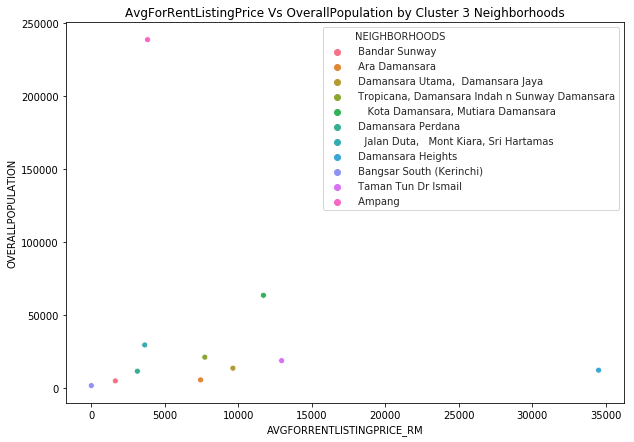

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,7))
plt.title('AvgForRentListingPrice Vs OverallPopulation by Cluster 3 Neighborhoods')
sns.set_style("whitegrid")
sns.scatterplot(x='AVGFORRENTLISTINGPRICE_RM',y='OVERALLPOPULATION',marker='o', hue='NEIGHBORHOODS', data=GKL_combineC3)


## Discussion

Based on the segmentation & clustering of Greater Kuala Lumpur neighborhoods, it can be categorized as below: 
* <h4> Cluster 1:</h4> Mostly with Local ethnic/Asian Restaurants, Fast foods, Cafe/coffee shops.  
Crime level is average to high.
* <h4> Cluster 2:</h4> Mostly with Hotels, Bar/lounge, local ethnic/Asian Restaurants, Cafe/Coffee shops, Dessert shops.  
Crime level is average to high.
* <h4> Cluster 3:</h4> Mostly with Cafe/Coffee shops, local ethnic/Asian Restaurants, Dessert/Icecream shops, Yoga/Gym & fitness center, Bakery, Spa/massage, retails. Crime level is low to average.
* <h4> Cluster 4:</h4> Mostly with local chinese/Indian/Japanese Restaurant, Cafe/Coffee shops.  
Crime level is average to high.  

From the segmented clusters above, the neighborhoods in cluster 3 is the most suitable as it has most of the surronding business that can compliment to coffee businees which are Yoga/fitness centre, retails, bakery & restaurants compare to other clusters. Next, I will further breakdown to identify which is the right neighborhood to open a new coffee shop based on the demographic data(population, crime level, Avg for rent listing price).

The scatter plot(Avg For Rent Listing Price(RM) Vs Overall Population of Neighborhoods in Cluster 3) shown neighborhood 'Ampang' has the highest population with moderate Rent price and average crime level, follow by 'Damansara Perdana' and 'Kota Damansara/Mutiara Damansara' among the neighborhoods in cluster 3.

<h4>Based on the clustering neighborhood data and scatterplot on Avg Rent price vs Overall population, I recommend neighborhood 'Ampang' from cluster 3 as the best location to open new coffee shop. 


## Conclusion

In summary, using machine learning- Kmean clustering and data analysis with python on location data using foursquare API can be useful in segmenting/clustering the neighborhoods to identify the best location for opening a new coffee shop in Greater Kuala Lumpur. The result show neighborhood 'Ampang' is the best location as it has the highest population with reasonable rent price and average crime level as well as complimentary business among the neighborhoods in cluster 3.
In near future, can include foot/vehicle traffic as one of the factor in deciding the location for opening new restaurat/coffee shop too.

This project not only can help my friend to solve the location problem for opening his new coffee shop in Greater Kuala Lumpur, but it can be beneficial to those who is interested in opening new restaurant or exploring neighborhoods in Greater Kuala Lumpur.